最小生成树算法——及其nexworkx实现

1. 连通的无圈图成为树
2. 若图G是树
(1) 图G中任意两个不同顶点之间存在唯一的路
(2) 图G连通，删除任意一条边均不连通
(3) 图G连通，且顶点数=边数+1
(4) 图G无圈，添加任意一条边可得唯一的圈
3. 若图G的生成子图H是树，则称H为G的生成树或支撑树，一个图的生成树通常不唯一
4. 连通图的生成树一定存在
5. 在赋权图G中，边权之和最小的生成树称为G的最小生成树

最小生成树的求解
1. Kruskal（克鲁斯卡尔）算法（适合点多变少的图）
    1.1 把图G中所有边全部去掉，得到所有单独的顶点V构成的图T
    1.2 从图G中取出当前权值最小的边，如果该边加入T的边集合后T不形成回路，则加入T，否则舍弃
    1.3 重复第二步，知道T中有n-1条边（n是顶点数）
2. Prim（普里姆）算法（适合边多点少的图）
    2.1 设一空图U，首先将图G中任意一顶点取出加入U中
    2.2 从图U外并与图U相连的边中，找到权值最小的边和该边连接的顶点并入图U中
    2.3 重复第二步，直到U中包含了所有顶点

3. 用networkx求最小生成树
networkx 求最小生成树函数为 minimum_spanning_tree,其调用格式为：
T = minimun_spanning_tree(G, weight='weight', algorithm='kruskal'/'prim'/'boruvka')
返回值T为所求得的最小生成树的可迭代对象

最小生成树为: {(1, 5): 2, (2, 3): 4, (3, 5): 1, (3, 4): 2}
最小生成树的长度为: 9


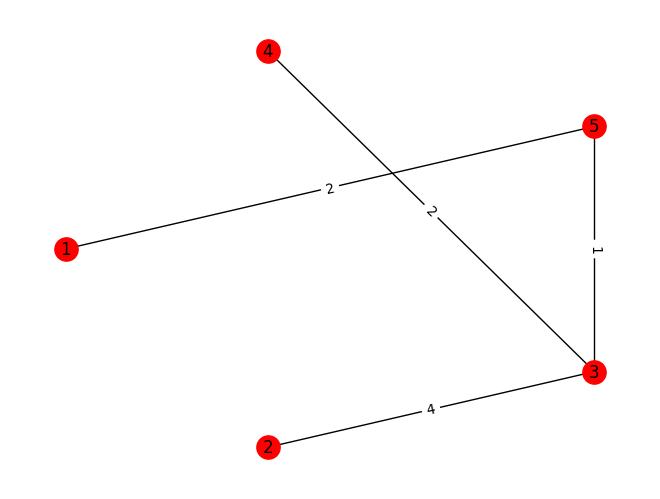

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

L = [(1,2,8),(1,3,4),(1,5,2),
     (2,3,4),
     (3,4,2),(3,5,1),
     (4,5,5)]
b = nx.Graph()
b.add_weighted_edges_from(L)
T = nx.minimum_spanning_tree(b)  #返回可迭代对象
w = nx.get_edge_attributes(T,'weight')  #提取字典数据
TL = sum(w.values())  #记算最小生成树的长度
print('最小生成树为:', w)
print('最小生成树的长度为:', TL)
pos = nx.shell_layout(b)
nx.draw(T,pos,node_size=280,with_labels=True,node_color='r')
nx.draw_networkx_edge_labels(T,pos,edge_labels=w)
plt.show()